# Muhamad Abdulah Ridwan
# Nim : 221351084
# kelas : Pagi C

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# membaca dataset
data = pd.read_csv('dataset_nasabah.csv')

In [3]:
data.head()



,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,Pria,Ya,30.7,1,4744854
1,2,26,Pria,Ya,28.2,0,0
2,3,19,Pria,Ya,22.3,4,5780796
3,4,53,Pria,Tidak,22.1,4,22669060
4,5,69,Pria,Ya,30.0,2,11323814


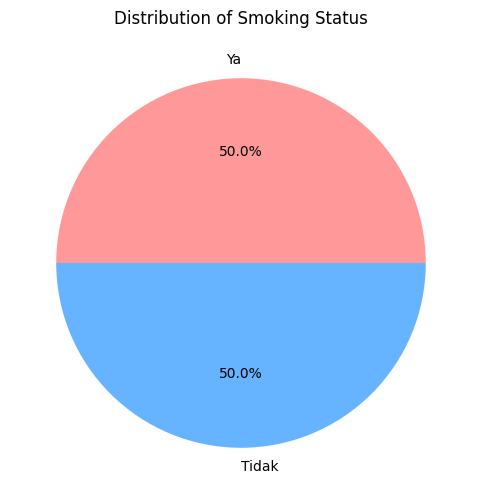

In [4]:
#pie plot
plt.figure(figsize=(8, 6))
data['Status Merokok'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Smoking Status')
plt.ylabel('') 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25780\3516086132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status Merokok', y='Total Biaya Klaim', data=data, palette='Set3')


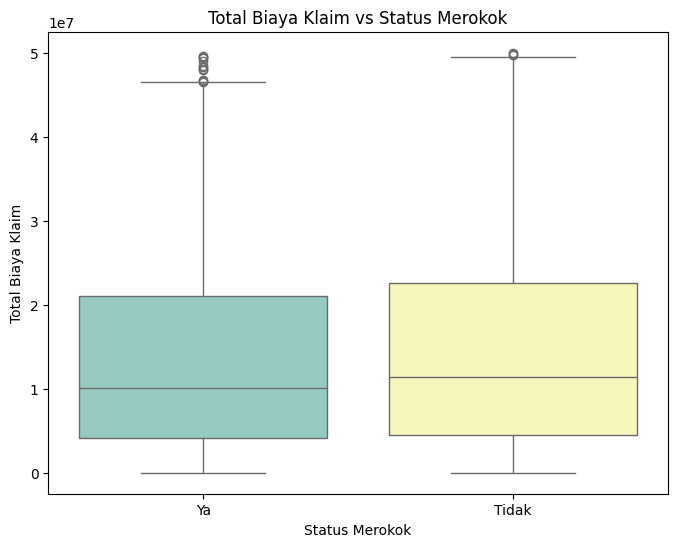

In [5]:
# boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x='Status Merokok', y='Total Biaya Klaim', data=data, palette='Set3')
plt.title('Total Biaya Klaim vs Status Merokok')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25780\917124041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status Merokok', y='Total Biaya Klaim', data=data, palette='Set2')


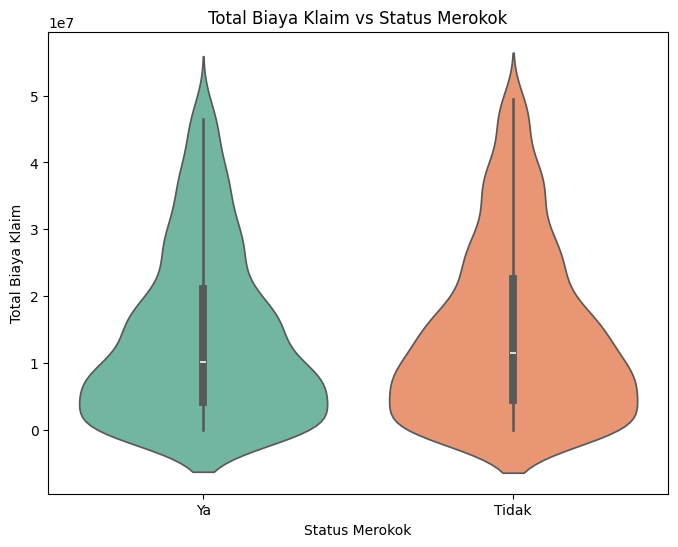

In [6]:
#violin plot

plt.figure(figsize=(8, 6))
sns.violinplot(x='Status Merokok', y='Total Biaya Klaim', data=data, palette='Set2')
plt.title('Total Biaya Klaim vs Status Merokok')
plt.show()

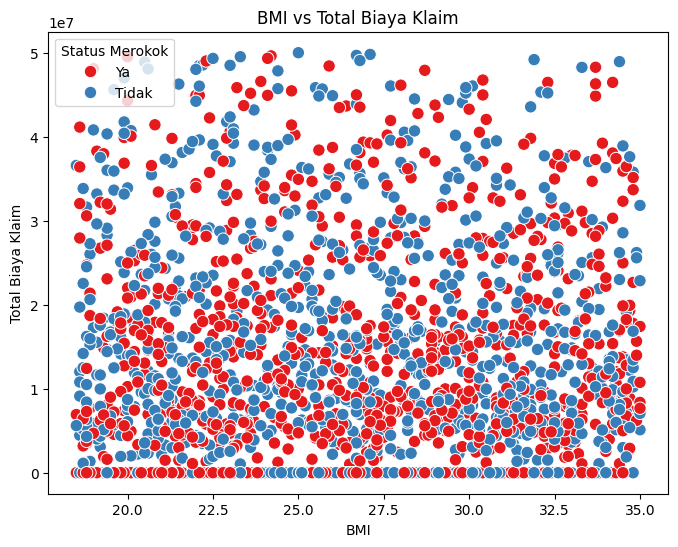

In [7]:
#scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Total Biaya Klaim', hue='Status Merokok', data=data, palette='Set1', s=80, edgecolor='w')
plt.title('BMI vs Total Biaya Klaim')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25780\4155326447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Merokok', data=data, palette='Set2')


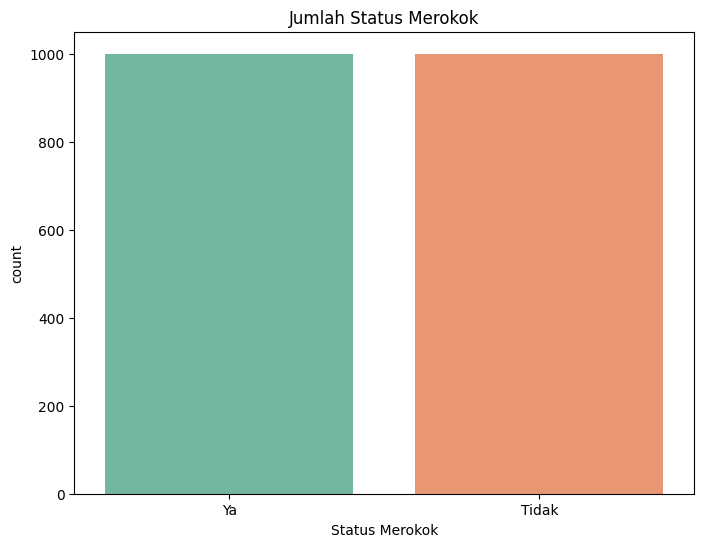

In [8]:
#count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Status Merokok', data=data, palette='Set2')
plt.title('Jumlah Status Merokok')
plt.show()

In [9]:
# Mengonversi kolom kategori menjadi numerik
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'Pria': 0, 'Wanita': 1})
data['Status Merokok'] = data['Status Merokok'].map({'Tidak': 0, 'Ya': 1})


In [10]:
 data.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,0,1,30.7,1,4744854
1,2,26,0,1,28.2,0,0
2,3,19,0,1,22.3,4,5780796
3,4,53,0,0,22.1,4,22669060
4,5,69,0,1,30.0,2,11323814


In [11]:
#
features = ['Usia', 'Jenis Kelamin', 'Status Merokok', 'BMI', 'Jumlah Klaim', 'Total Biaya Klaim']
X = data[features]

In [12]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# create linked

linked = linkage(X_scaled, method='ward')

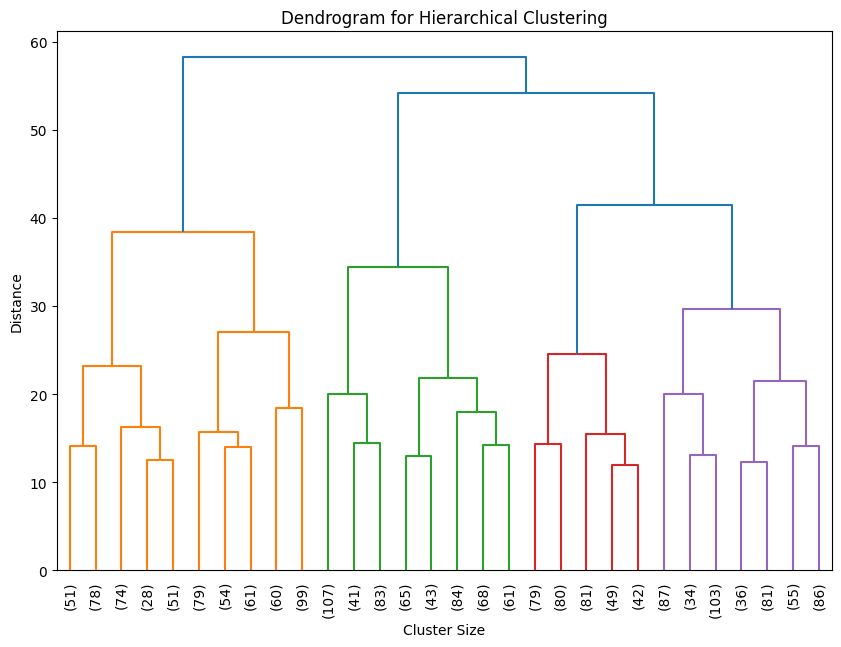

In [14]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [15]:
# Membuat label cluster
cluster_labels = cut_tree(linked, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 4, 4])

In [16]:
# Gabungkan label cluster dengan data
data['Cluster_Labels'] = cluster_labels

In [17]:
data.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim,Cluster_Labels
0,1,58,0,1,30.7,1,4744854,0
1,2,26,0,1,28.2,0,0,0
2,3,19,0,1,22.3,4,5780796,0
3,4,53,0,0,22.1,4,22669060,1
4,5,69,0,1,30.0,2,11323814,0


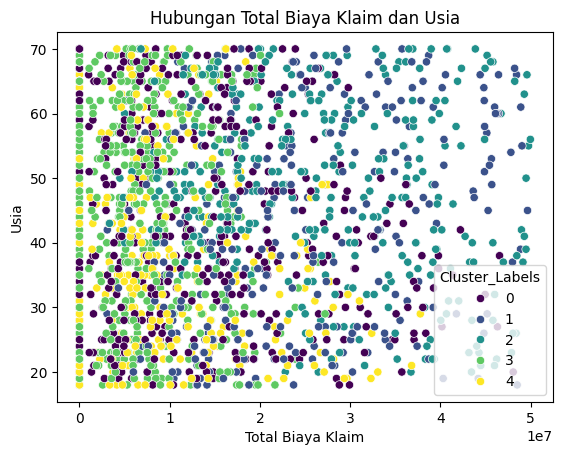

In [18]:
#
plt.figure()
sns.scatterplot(
    data=data,
    x='Total Biaya Klaim',    
    y='Usia',                  
    hue='Cluster_Labels',      
    palette='viridis'
)
plt.title("Hubungan Total Biaya Klaim dan Usia")
plt.xlabel("Total Biaya Klaim")
plt.ylabel("Usia")
plt.show()



<br>Scatterplot membantu mengidentifikasi pola visual antar cluster berdasarkan usia dan total biaya klaim, memberikan indikasi tentang faktor mana yang signifikan dalam pembentukan cluster.

C:\Users\user\AppData\Local\Temp\ipykernel_25780\4065739557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


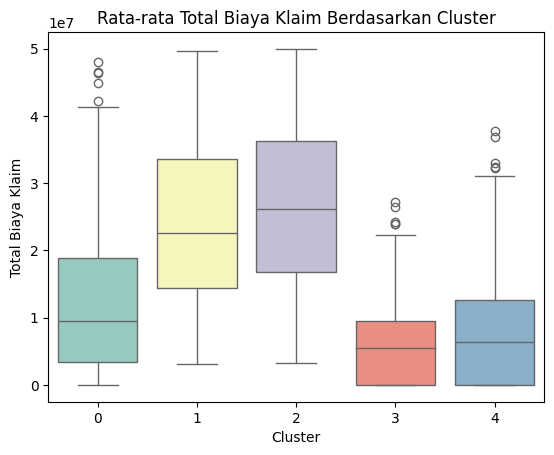

In [19]:
plt.figure()
sns.boxplot(
    data=data,
    x='Cluster_Labels',     
    y='Total Biaya Klaim',     
    palette='Set3'
)
plt.title("Rata-rata Total Biaya Klaim Berdasarkan Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Biaya Klaim")
plt.show()

<br> Boxplot memberikan gambaran yang lebih jelas mengenai perbedaan karakteristik antar cluster, terutama terkait dengan distribusi usia dan biaya klaim. Ini membantu dalam mengidentifikasi faktor utama yang membedakan tiap cluster.